# CORRELATIONS: POWERFUL OR MEANINGLESS?

# Table of Contents <a id='toc0'></a>  
- 1. [Introduction](#toc1) 
- 2. [Data Description](#toc2)  
  - 2.1. [Importing](#toc2_1)  
  - 2.2. [Cleaning](#toc2_2)
  - 2.3. [Merging](#toc2_3)  
- 3. [Plotting and Correlations](#toc3)   
- 4. [Conclusion](#toc4)   

## 1. <a id='toc1'></a>[Introduction](#toc0)

**Correlation** is a statistical measure that describes the extent to which two variables move together:
    
- If the value of one variable increases as the other increases, the correlation is positive;
 
- If one decreases as the other increases, the correlation is negative.

When statistically significant correlation results are found, interesting conclusions can be withdrawn. 

However, correlations can be missleading... Not all correlations imply causality! Some correlations might be coincidental or due to an unseen third factor, leading to **spurious relationships**.

The aim of this project is to ilustrate how correlations can be both powerfull and tricky, through the correlation analysis of two pairs of variables: 

- U.S. GDP per capita and Life Expectancy - Two variables that we can find strong potential reasons to move together.
- World Chicken production and Percentage of Individuals Using the Internet - two variables that seem to be independent of each other. 


## 2. <a id='toc2'></a>[Data Description](#toc0)

All the data used in this project was extracted from Our World in Data, and then transfered to the Data folder in this repository, in April 2024: 
- Chicken Production (per tonne):  https://ourworldindata.org/grapher/chicken-meat-production?tab=chart 
- Adoption of communication technologies per 100 people : https://ourworldindata.org/grapher/ict-adoption-per-100-people 
- GDP per Capita: https://ourworldindata.org/grapher/gdp-per-capita-maddison?tab=chart
- Life expectancy: https://ourworldindata.org/grapher/life-expectancy

### 2.1. <a id='toc2_1'></a>[Importing](#toc0)

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


In [2]:
# Importing datasets
import os 

# Using assert to check that paths exist on computer.
assert os.path.isdir('data/')
assert os.path.isfile('data/chicken-meat-production.xlsx')
assert os.path.isfile('data/ict-adoption-per-100-people.xlsx')
assert os.path.isfile ('data/gdp-per-capita-maddison.xlsx')
assert os.path.isfile ('data/life-expectancy.xlsx')

# Print everything in data
os.listdir('data/')

['chicken-meat-production.xlsx',
 'gdp-per-capita-maddison.xlsx',
 'ict-adoption-per-100-people.xlsx',
 'life-expectancy.xlsx',
 '~$gdp-per-capita-maddison.xlsx']

### 2.2. <a id='toc2_2'></a>[Cleaning](#toc0)

In this section, we clean up the data in terms of columns, rows, removing uncessary data points and making the dataset useable in python. 

# Chicken Production Data

In [3]:
filename1 = 'data/chicken-meat-production.xlsx' # Open the file and have a look at it
pd.read_excel(filename1).head(10)

,chicken-meat-production,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Entity,Code,Year,"Meat, chicken | 00001058 || Production | 00551..."
1,Afghanistan,AFG,1961,5600
2,Afghanistan,AFG,1962,6000
3,Afghanistan,AFG,1963,6160
4,Afghanistan,AFG,1964,6400
5,Afghanistan,AFG,1965,6800
6,Afghanistan,AFG,1966,7200
7,Afghanistan,AFG,1967,7600
8,Afghanistan,AFG,1968,8000
9,Afghanistan,AFG,1969,9600


There are several aspects to be cleaned in this data set:
 
**(1) Unnamed headings**: There are some 'unnamed' headings from row 1, we will be skipping that row.

**(2) Last column title**: The final column title is unreadable, hence we will rename it.

**(3) Droping Codes**: For the purpose of our analysis the code column is not needed - some are country codes, some are other codes, and many are blank- we will remove this column. 



In [4]:
# 1. Cleaning 'unnamed rows'
chicken_prod = pd.read_excel(filename1, skiprows=1)

# 2. Fixing title heading for tonnes of production
chicken_prod.rename(columns = {'Meat, chicken | 00001058 || Production | 005510 || tonnes':'Chicken Production (per tonne)'}, inplace=True)

# 3. Removing 'code' column
drop_these1 = 'Code'
print(drop_these1)

chicken_prod.drop(drop_these1, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made

# Clearer table
chicken_prod.head(5)


Code


,Entity,Year,Chicken Production (per tonne)
0,Afghanistan,1961,5600.0
1,Afghanistan,1962,6000.0
2,Afghanistan,1963,6160.0
3,Afghanistan,1964,6400.0
4,Afghanistan,1965,6800.0


Taking a look at our current data set, after initial cleanings, there is also some data which we would like to remove and edit:

**(1) Year names**: Having a variable named as a number can cause problems with some functions in python. So, we will alter all dates from '[year]' to 'p[year]'


**(2) Data parameters**: We are interested in the world consumption, not individual countries. We will be removing all entities that are counties. 



In [5]:
# 1. Renaming all year rows

# Setting up new year names
year_renaming = {str(year): f"p{year}" for year in chicken_prod['Year'].unique()}

# Replacing the dataset
chicken_prod['Year'] = chicken_prod['Year'].astype(str).replace(year_renaming)

chicken_prod.head(10)

,Entity,Year,Chicken Production (per tonne)
0,Afghanistan,p1961,5600.0
1,Afghanistan,p1962,6000.0
2,Afghanistan,p1963,6160.0
3,Afghanistan,p1964,6400.0
4,Afghanistan,p1965,6800.0
5,Afghanistan,p1966,7200.0
6,Afghanistan,p1967,7600.0
7,Afghanistan,p1968,8000.0
8,Afghanistan,p1969,9600.0
9,Afghanistan,p1970,9600.0


In [6]:
# 2. Dropping all other individual country data
# Build up a logical index I for all relevant data
I = chicken_prod.Entity.str.contains('World')

# Removing all others
chicken_prod = chicken_prod.loc[I == True] 
chicken_prod.head(10)


,Entity,Year,Chicken Production (per tonne)
13962,World,p1961,7555182.0
13963,World,p1962,7883740.5
13964,World,p1963,8371885.0
13965,World,p1964,8676732.0
13966,World,p1965,9414006.0
13967,World,p1966,9997727.0
13968,World,p1967,10564304.0
13969,World,p1968,11030933.0
13970,World,p1969,11941510.0
13971,World,p1970,13139430.0


In [7]:
# Final clean 

# Resetting the index
chicken_prod.reset_index(inplace = True, drop = True) # Drop old index too

chicken_prod.head(10)


,Entity,Year,Chicken Production (per tonne)
0,World,p1961,7555182.0
1,World,p1962,7883740.5
2,World,p1963,8371885.0
3,World,p1964,8676732.0
4,World,p1965,9414006.0
5,World,p1966,9997727.0
6,World,p1967,10564304.0
7,World,p1968,11030933.0
8,World,p1969,11941510.0
9,World,p1970,13139430.0


In [8]:
# Final check that we have all the data needed
Final_entity = chicken_prod['Entity'].unique()
print(Final_entity)

all_years = chicken_prod['Year'].unique()
print(all_years)


['World']
['p1961' 'p1962' 'p1963' 'p1964' 'p1965' 'p1966' 'p1967' 'p1968' 'p1969'
 'p1970' 'p1971' 'p1972' 'p1973' 'p1974' 'p1975' 'p1976' 'p1977' 'p1978'
 'p1979' 'p1980' 'p1981' 'p1982' 'p1983' 'p1984' 'p1985' 'p1986' 'p1987'
 'p1988' 'p1989' 'p1990' 'p1991' 'p1992' 'p1993' 'p1994' 'p1995' 'p1996'
 'p1997' 'p1998' 'p1999' 'p2000' 'p2001' 'p2002' 'p2003' 'p2004' 'p2005'
 'p2006' 'p2007' 'p2008' 'p2009' 'p2010' 'p2011' 'p2012' 'p2013' 'p2014'
 'p2015' 'p2016' 'p2017' 'p2018' 'p2019' 'p2020' 'p2021' 'p2022']


This looks good, all individual countries are not listed.

# Usage of Internet

In [9]:
filename2 = 'data/ict-adoption-per-100-people.xlsx' # open the file and have a look at it
pd.read_excel(filename2).head(5)

,ict-adoption-per-100-people,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Entity,Code,Year,Fixed telephone subscriptions (per 100 people),Fixed broadband subscriptions (per 100 people),Mobile cellular subscriptions (per 100 people),Individuals using the Internet (% of population)
1,Afghanistan,AFG,1960,0.089302,NaN,0,NaN
2,Afghanistan,AFG,1961,0.085584,NaN,NaN,NaN
3,Afghanistan,AFG,1962,0.085584,NaN,NaN,NaN
4,Afghanistan,AFG,1963,0.085584,NaN,NaN,NaN


Follwoing the same structure, we will start by making innitial cleanings in this data set:
 
**(1) Unnamed headings** : There are some 'unnamed' headings from row 1, we will be skipping that row.

**(2) Droping columns** :  Just as before, we are not interested in using the country codes, so we will remove its column. Additionally, we also just want to look at data from Individuals using the Internet (% of population), so we will drop the remaining columns. 

In [10]:
# 1. Skipping row 1:
tech = pd.read_excel(filename2, skiprows=1)
tech.head(10)

# 2. Removing columns:
drop_these2 = ('Code', 'Fixed telephone subscriptions (per 100 people)' , 'Fixed broadband subscriptions (per 100 people)', 'Mobile cellular subscriptions (per 100 people)') 
print(drop_these2)

columns_to_drop = list(drop_these2)
tech.drop(columns_to_drop, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made

# Clearer table
tech.head(5)

('Code', 'Fixed telephone subscriptions (per 100 people)', 'Fixed broadband subscriptions (per 100 people)', 'Mobile cellular subscriptions (per 100 people)')


,Entity,Year,Individuals using the Internet (% of population)
0,Afghanistan,1960,NaN
1,Afghanistan,1961,NaN
2,Afghanistan,1962,NaN
3,Afghanistan,1963,NaN
4,Afghanistan,1964,NaN


Taking a look at our current data set, after initial cleanings, there is also some data which we would like to remove and edit:

**(1) Year names**: Having a variable named as a number can cause problems with some functions in python. So, we will alter all dates from '[year]' to 'p[year]'


**(2) Data parameters**: We are interested in world consumption, not individual countries. We will be removing all entities that are counties. 

**(3) Missing Values**: In this dataset, there are a few missing values. We should therefore remove them from out dataset. ###not sure which column we want to use, so i have the code below but havnt put it in as i think the whole row is removed !!

In [11]:
# 1. Renaming all year rows

#setting up new year names
year_renaming = {str(year): f"p{year}" for year in tech['Year'].unique()}

#replacing the dataset
tech['Year'] = tech['Year'].astype(str).replace(year_renaming)

tech.head(10)

,Entity,Year,Individuals using the Internet (% of population)
0,Afghanistan,p1960,NaN
1,Afghanistan,p1961,NaN
2,Afghanistan,p1962,NaN
3,Afghanistan,p1963,NaN
4,Afghanistan,p1964,NaN
5,Afghanistan,p1965,NaN
6,Afghanistan,p1966,NaN
7,Afghanistan,p1967,NaN
8,Afghanistan,p1968,NaN
9,Afghanistan,p1969,NaN


In [12]:
# 2. Dropping all other individual country data
# Build up a logical index I for all relevant data
I = tech.Entity.str.contains('World')

# Removing all others
tech = tech.loc[I == True] 
tech.head(10)


,Entity,Year,Individuals using the Internet (% of population)
12499,World,p1966,NaN
12500,World,p1967,NaN
12501,World,p1968,NaN
12502,World,p1969,NaN
12503,World,p1971,NaN
12504,World,p1972,NaN
12505,World,p1973,NaN
12506,World,p1974,NaN
12507,World,p1975,NaN
12508,World,p1976,NaN


In [13]:
# 4. Drop rows with missing values. Denoted na
tech.dropna(inplace=True)
tech.head(10)


,Entity,Year,Individuals using the Internet (% of population)
12522,World,p1990,0.048825
12523,World,p1991,0.078811
12524,World,p1992,0.125186
12525,World,p1993,0.179007
12526,World,p1994,0.360508
12527,World,p1995,0.683082
12528,World,p1996,1.326567
12529,World,p1997,2.042697
12530,World,p1998,3.140580
12531,World,p1999,4.632903


In [14]:
# Final clean 

# Resetting the index
tech.reset_index(inplace = True, drop = True) # Drop old index too

In [15]:
# Final check that we have all the data needed
all_groups = tech['Entity'].unique()
print(all_groups)

all_years = tech['Year'].unique()
print(all_years)

['World']
['p1990' 'p1991' 'p1992' 'p1993' 'p1994' 'p1995' 'p1996' 'p1997' 'p1998'
 'p1999' 'p2000' 'p2001' 'p2002' 'p2003' 'p2004' 'p2005' 'p2006' 'p2007'
 'p2008' 'p2009' 'p2010' 'p2011' 'p2012' 'p2013' 'p2014' 'p2015' 'p2016'
 'p2017' 'p2018' 'p2019' 'p2020']


# GDP per Capita

In [16]:
filename3 = 'data/gdp-per-capita-maddison.xlsx' # open the file and have a look at it
pd.read_excel(filename3).head(5)

,gdp-per-capita-maddison,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Entity,Code,Year,GDP per capita,417485-annotations
1,Afghanistan,AFG,1950,1156,NaN
2,Afghanistan,AFG,1951,1170,NaN
3,Afghanistan,AFG,1952,1189,NaN
4,Afghanistan,AFG,1953,1240,NaN


As GDP per capita is from the same data source as the data sets on Chicken production and Internet usage, the idea behind the data cleaning process is precisely the same. Consequently, to avoid repetition of the coding thought process, we used the py file called **DataProject.py** to define a class called **DataCleaner**. This class will allow to recreate the data cleaning methods as seen above. 

In [17]:
from DataProject import DataCleaner

# Clean GDP data
gdp_cleaner = DataCleaner(filename3, skip_rows=1)
gdp_cleaner.drop_columns(['Code','417485-annotations'])
gdp_cleaner.new_year_name()
gdp_cleaner.keep_rows('Entity','United States')
gdp_cleaner.drop_missing_values()
gdp_cleaner.restart_index()
gdp_data = gdp_cleaner.get_cleaned_data()


gdp_data.head()

,Entity,Year,GDP per capita
0,United States,p1650,897.0000
1,United States,p1720,1768.9856
2,United States,p1775,2419.0000
3,United States,p1800,2545.4880
4,United States,p1801,2591.7695


# Life Expectancy

In [18]:
filename4 = 'data/life-expectancy.xlsx' # open the file and have a look at it
pd.read_excel(filename4).head(5)

,life-expectancy,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Entity,Code,Year,Period life expectancy at birth - Sex: all - A...
1,Afghanistan,AFG,1950,27.7275
2,Afghanistan,AFG,1951,27.9634
3,Afghanistan,AFG,1952,28.4456
4,Afghanistan,AFG,1953,28.9304


We also used the **DataProject.py** to clean the data for the Life Expectancy, for simplicity and neatness.

In [19]:
# Clean Life Expectancy data
life_exp_cleaner = DataCleaner(filename4, skip_rows=1)
life_exp_cleaner.rename_columns({'Period life expectancy at birth - Sex: all - Age: 0':'Life expectancy at birth (years)'})
life_exp_cleaner.drop_columns('Code')
life_exp_cleaner.new_year_name()
life_exp_cleaner.keep_rows('Entity','United States')
life_exp_cleaner.drop_missing_values()
life_exp_cleaner.restart_index()
life_exp_data = life_exp_cleaner.get_cleaned_data()


life_exp_data.head()

,Entity,Year,Life expectancy at birth (years)
0,United States,p1880,39.41
1,United States,p1890,45.21
2,United States,p1901,49.30
3,United States,p1902,50.50
4,United States,p1903,50.60


### 2.3. <a id='toc2_3'></a>[Merging](#toc0)

To analyse the correlations, we need to merge the two relevant data sets together. We start by checking the number of years and regions each one has. 

# Chicken Production + Internet Usage

In [20]:
print(f'Years in Chicken Production: {chicken_prod.Year.unique()}')
print(f'Regions in Chicken Production = {len(chicken_prod.Entity.unique())}')
print(f'Years in Communication Technology : {tech.Year.unique()}')
print(f'Regions in Communication Technology = {len(tech.Entity.unique())}')

Years in Chicken Production: ['p1961' 'p1962' 'p1963' 'p1964' 'p1965' 'p1966' 'p1967' 'p1968' 'p1969'
 'p1970' 'p1971' 'p1972' 'p1973' 'p1974' 'p1975' 'p1976' 'p1977' 'p1978'
 'p1979' 'p1980' 'p1981' 'p1982' 'p1983' 'p1984' 'p1985' 'p1986' 'p1987'
 'p1988' 'p1989' 'p1990' 'p1991' 'p1992' 'p1993' 'p1994' 'p1995' 'p1996'
 'p1997' 'p1998' 'p1999' 'p2000' 'p2001' 'p2002' 'p2003' 'p2004' 'p2005'
 'p2006' 'p2007' 'p2008' 'p2009' 'p2010' 'p2011' 'p2012' 'p2013' 'p2014'
 'p2015' 'p2016' 'p2017' 'p2018' 'p2019' 'p2020' 'p2021' 'p2022']
Regions in Chicken Production = 1
Years in Communication Technology : ['p1990' 'p1991' 'p1992' 'p1993' 'p1994' 'p1995' 'p1996' 'p1997' 'p1998'
 'p1999' 'p2000' 'p2001' 'p2002' 'p2003' 'p2004' 'p2005' 'p2006' 'p2007'
 'p2008' 'p2009' 'p2010' 'p2011' 'p2012' 'p2013' 'p2014' 'p2015' 'p2016'
 'p2017' 'p2018' 'p2019' 'p2020']
Regions in Communication Technology = 1


In [21]:
# Finding Differences:
diff_y = [y for y in chicken_prod.Year.unique() if y not in tech.Year.unique()] 
print(f'Years in Chicken Production data, but not in Communication Technology data: {diff_y}')


Years in Chicken Production data, but not in Communication Technology data: ['p1961', 'p1962', 'p1963', 'p1964', 'p1965', 'p1966', 'p1967', 'p1968', 'p1969', 'p1970', 'p1971', 'p1972', 'p1973', 'p1974', 'p1975', 'p1976', 'p1977', 'p1978', 'p1979', 'p1980', 'p1981', 'p1982', 'p1983', 'p1984', 'p1985', 'p1986', 'p1987', 'p1988', 'p1989', 'p2021', 'p2022']


We can see that Chicken production data has more years available than the Communication Technology data set. However, since the purpose of this analysis is to compute correlations, we do not want to have a data set with missing values for Communication Technology, hence we will use **inner** merging method. With this method we will be only merging the years both data sets have in common, dropping the remainings. 

In [22]:
# Inner Merging:
chicken_tech = pd.merge(chicken_prod,tech,how='inner',on=['Entity','Year'])

print(f'Number of years          = {len(chicken_tech.Year.unique())}')

chicken_tech.head(10)

Number of years          = 31


,Entity,Year,Chicken Production (per tonne),Individuals using the Internet (% of population)
0,World,p1990,35415424.0,0.048825
1,World,p1991,38191256.0,0.078811
2,World,p1992,39851016.0,0.125186
3,World,p1993,42397028.0,0.179007
4,World,p1994,44822450.0,0.360508
5,World,p1995,47566492.0,0.683082
6,World,p1996,49159212.0,1.326567
7,World,p1997,52318396.0,2.042697
8,World,p1998,54535188.0,3.140580
9,World,p1999,56892450.0,4.632903


# GDP per Capita + Life Expectancy

The exact same reasoning is applied as above. 

In [23]:
print(f'Years in GDP per Capita = {len(gdp_data.Year.unique())}')
print(f'Regions in GDP per Capita = {len(gdp_data.Entity.unique())}')
print(f'Years in Life Expectancy = {len(life_exp_data.Year.unique())}')
print(f'Regions in Life Expectancy = {len(life_exp_data.Entity.unique())}')

Years in GDP per Capita = 222
Regions in GDP per Capita = 1
Years in Life Expectancy = 123
Regions in Life Expectancy = 1


In [24]:
# Finding Differences:
diff_y = [y for y in gdp_data.Year.unique() if y not in life_exp_data.Year.unique()] 
print(f'Years in GDP per Capita data, but not in Life Expectancy data: {diff_y}')


Years in GDP per Capita data, but not in Life Expectancy data: ['p1650', 'p1720', 'p1775', 'p1800', 'p1801', 'p1802', 'p1803', 'p1804', 'p1805', 'p1806', 'p1807', 'p1808', 'p1809', 'p1810', 'p1811', 'p1812', 'p1813', 'p1814', 'p1815', 'p1816', 'p1817', 'p1818', 'p1819', 'p1820', 'p1821', 'p1822', 'p1823', 'p1824', 'p1825', 'p1826', 'p1827', 'p1828', 'p1829', 'p1830', 'p1831', 'p1832', 'p1833', 'p1834', 'p1835', 'p1836', 'p1837', 'p1838', 'p1839', 'p1840', 'p1841', 'p1842', 'p1843', 'p1844', 'p1845', 'p1846', 'p1847', 'p1848', 'p1849', 'p1850', 'p1851', 'p1852', 'p1853', 'p1854', 'p1855', 'p1856', 'p1857', 'p1858', 'p1859', 'p1860', 'p1861', 'p1862', 'p1863', 'p1864', 'p1865', 'p1866', 'p1867', 'p1868', 'p1869', 'p1870', 'p1871', 'p1872', 'p1873', 'p1874', 'p1875', 'p1876', 'p1877', 'p1878', 'p1879', 'p1881', 'p1882', 'p1883', 'p1884', 'p1885', 'p1886', 'p1887', 'p1888', 'p1889', 'p1891', 'p1892', 'p1893', 'p1894', 'p1895', 'p1896', 'p1897', 'p1898', 'p1899', 'p1900']


Given our analysis purposes, we use again the inner merge method. 

In [25]:
# Inner Merging:
gdp_life_exp = pd.merge(gdp_data,life_exp_data,how='inner',on=['Entity','Year'])

print(f'Number of years          = {len(gdp_life_exp.Year.unique())}')

gdp_life_exp.head(10)

Number of years          = 120


,Entity,Year,GDP per capita,Life expectancy at birth (years)
0,United States,p1880,6255.7295,39.41
1,United States,p1890,6664.5503,45.21
2,United States,p1901,8770.3630,49.30
3,United States,p1902,8684.2280,50.50
4,United States,p1903,8941.3480,50.60
5,United States,p1904,8663.6580,49.60
6,United States,p1905,9121.3320,50.30
7,United States,p1906,9980.1130,50.10
8,United States,p1907,9950.5440,50.20
9,United States,p1908,8975.9770,51.90


## 3. <a id='toc3'></a>[Plotting and Correlations](#toc0)

A way to visualize possible correlations is by plotting the data series graphically:

# GDP per Capita + Life Expectancy

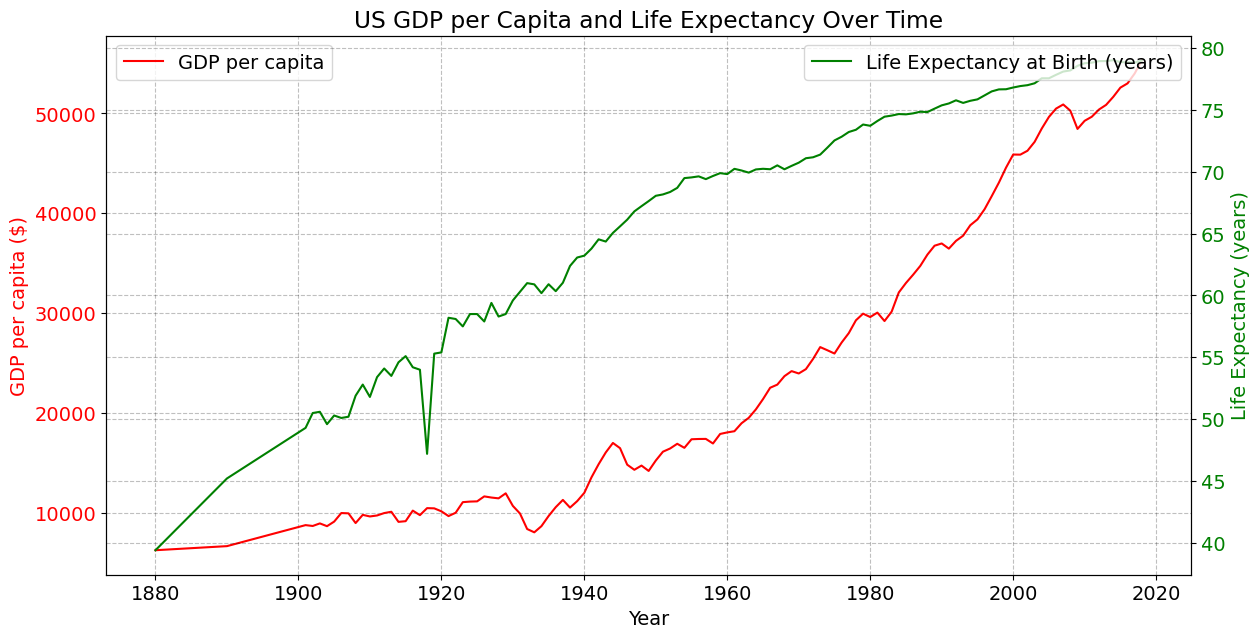

In [26]:
# Convert 'Year' from the format 'pYYYY' to 'YYYY' for cleaner graph
gdp_life_exp['Year'] = gdp_life_exp['Year'].str.replace('p', '').astype(int)

# Set the figure size
plt.figure(figsize=(14, 7))

# Plot GDP per capita data with the primary y-axis (left)
ax1 = plt.gca()  # Get the current Axes instance on the current figure matching
ax1.plot(gdp_life_exp['Year'], gdp_life_exp['GDP per capita'], color='r', label='GDP per capita')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita ($)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create a secondary y-axis (right) that shares the same x-axis for life expectancy data
ax2 = ax1.twinx()
ax2.plot(gdp_life_exp['Year'], gdp_life_exp['Life expectancy at birth (years)'], color='g', label='Life Expectancy at Birth (years)')
ax2.set_ylabel('Life Expectancy (years)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set the title and show the plot with the legend
plt.title('US GDP per Capita and Life Expectancy Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


The graph suggests that both US GDP per capita and Life expectancy move together, having an increasing trend over time. Let's check what the correlation coefficient tells us about these co-movements. 

In [27]:
# Compute the correlation between chicken production and internet usage
correlation = gdp_life_exp['GDP per capita'].corr(gdp_life_exp['Life expectancy at birth (years)'])

print(f"The correlation between U.S. GDP per Capita and Life Expectancy is: {correlation}")

The correlation between U.S. GDP per Capita and Life Expectancy is: 0.8649575032867545


# Chicken Production + Internet Usage

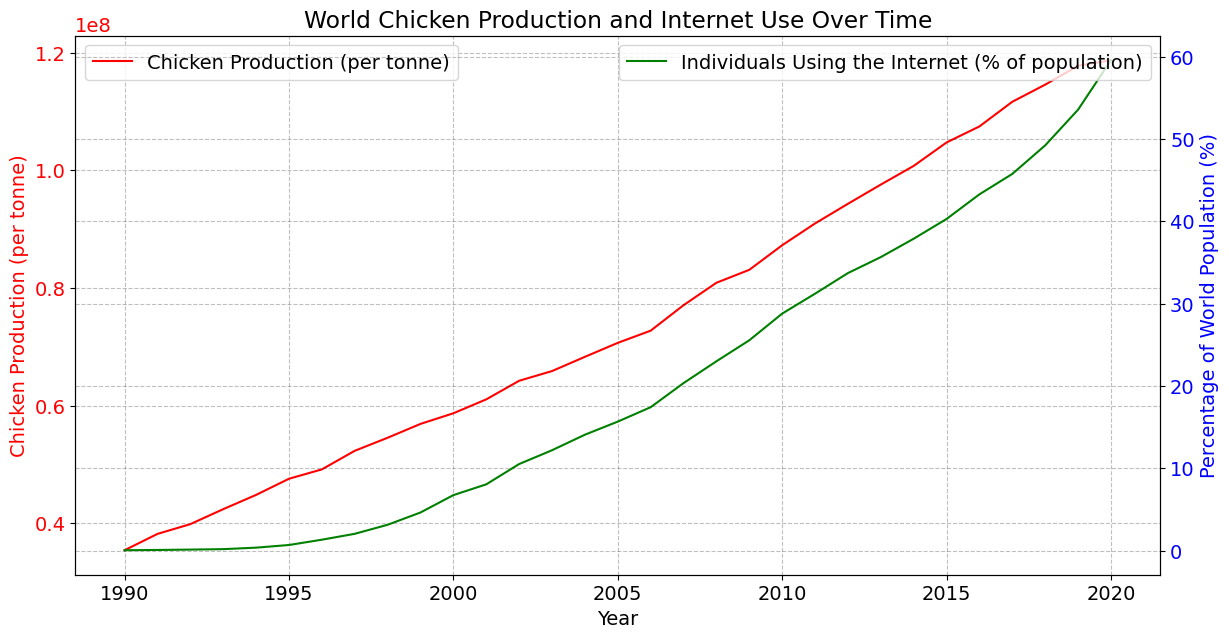

In [28]:
# Convert 'Year' from the format 'pYYYY' to 'YYYY' for cleaner graph
chicken_tech['Year'] = chicken_tech['Year'].str.replace('p', '').astype(int)

# Set the figure size
plt.figure(figsize=(14, 7))

# As we are using two data sets with different measurement units, we will be defining two different y-axis (left and right):

# Plot the Chicken Production data with the primary y-axis (left)
ax1 = plt.gca()  # Get the current Axes instance on the current figure matching
ax1.plot(chicken_tech['Year'], chicken_tech['Chicken Production (per tonne)'], color='r', label='Chicken Production (per tonne)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Chicken Production (per tonne)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create a secondary y-axis (right) that shares the same x-axis for Internet data
ax2 = ax1.twinx()
ax2.plot(chicken_tech['Year'], chicken_tech['Individuals using the Internet (% of population)'], color='g', label='Individuals Using the Internet (% of population)')
ax2.set_ylabel('Percentage of World Population (%)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Set the title and show the plot with the legend
plt.title('World Chicken Production and Internet Use Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

The graph suggests that both World Chicken Production and percentage of Individuals using the internet move together, having an increasing trend over time. Let's check what the correlation coefficient tells us about these co-movements. 

In [29]:
# Compute the correlation between chicken production and internet usage
correlation = chicken_tech['Chicken Production (per tonne)'].corr(chicken_tech['Individuals using the Internet (% of population)'])

print(f"The correlation between chicken production and internet usage is: {correlation}")

The correlation between chicken production and internet usage is: 0.9874445117601893


## 4. <a id='toc4'></a>[Conclusion](#toc0)

The correlation between U.S. GDP per Capita and Life Expectancy is 0.865. The result indicates a strong positive relationship between U.S. GDP per capita and life expectancy. This suggests that as GDP per capita increases, life expectancy tends to increase as well, and vice versa.

Intuitively, this result makes sense. Higher GDP per capita typically indicates that a country is wealthier. Wealthier countries can invest more in healthcare infrastructure, medical research, and services, which can lead to better health outcomes and longer life expectancy.

Our results also tell us that the correlation between chicken production and internet usage is 0.987. This is a positive and large correlation! Even larger than the correlation coefficient of GDP per capita and life expectancy! 

So... Can we know assert that increased internet usage directly causes a rise in chicken production?

Not really... 

This is an exemple of what is known as a spurious correlation, where two variables show a relationship not because one causes the other, but potentially due to coincidence, or because they are both influenced by a third factor, such as, possibly in this case, economic growth or technological development over time. 

Spurious correlations serve as a lesson in data analysis, emphasizing the importance of not mistaking correlation with causation. Without a theoretical basis or further analytical evidence to establish a cause-and-effect relationship, it is crucial to acknowledge that correlation alone can be highly misleading. This emphasises the necessity for rigorous statistical testing and analysis to discern true causal relationships from mere statistical artifacts.